# Neural Networks 

## Import and Prepare the Data

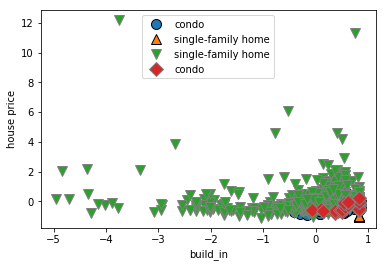

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn
from collections import Counter
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing


df = pandas.read_excel('house_price_label.xlsx')
# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
X = preprocessing.scale(X) # scale the data before training the model
y = df.house_type
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3,stratify = y, random_state=0) 

# for classification, make sure a stratify splitting method is selected
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

## Multilayer Perceptrons (MLP)

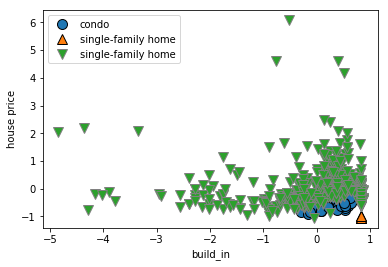

Training set accuracy: 0.83
Training Kappa: 0.473
Test set accuracy: 0.82
Test Kappa: 0.434


In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

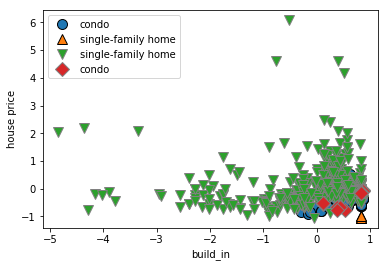

Training set accuracy: 0.89
Training Kappa: 0.696
Test set accuracy: 0.83
Test Kappa: 0.515


In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20,20), random_state=0).fit(X_train, y_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],mlp.predict(X_train))
plt.legend(y,loc='best')
plt.xlabel('build_in')
plt.ylabel('house price')
plt.show()

print("Training set accuracy: {:.2f}".format(mlp.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,mlp.predict(X_train))))
print("Test set accuracy: {:.2f}".format(mlp.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,mlp.predict(X_test))))

## Tuning the Parameters

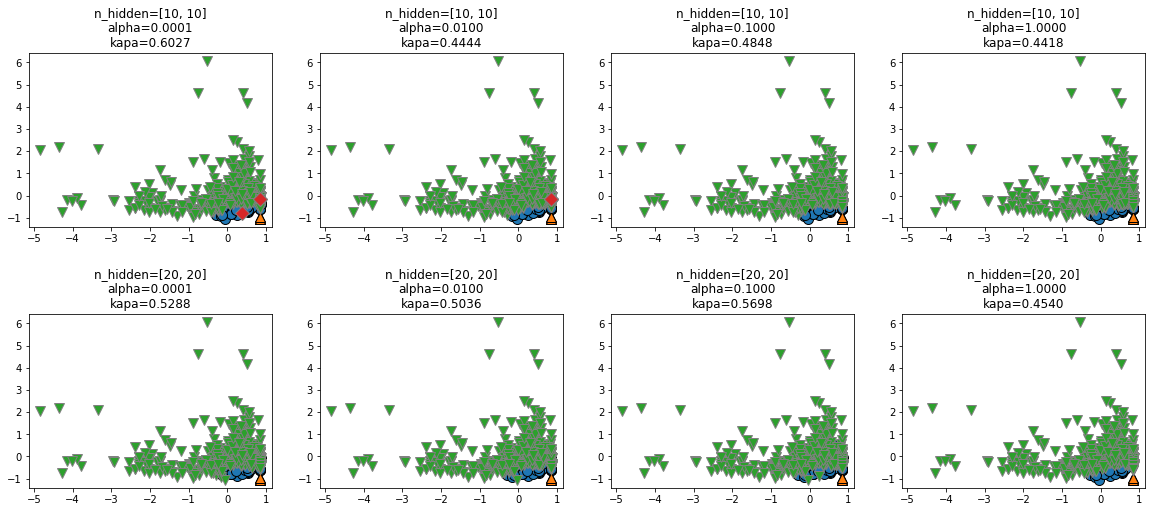

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 20]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)

        mlp.fit(X_train, y_train)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], mlp.predict(X_train), ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}\nkapa={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha,cohen_kappa_score(y_train,mlp.predict(X_train))))
        
plt.subplots_adjust(hspace=0.5)

## Inspect the Model

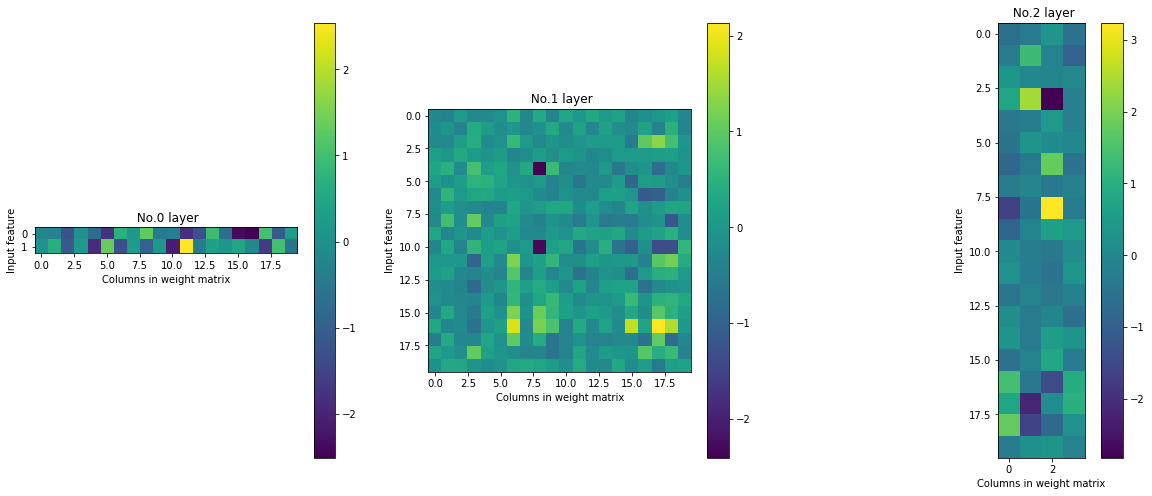

In [6]:
mlp = MLPClassifier(solver='lbfgs',  hidden_layer_sizes=(20,20), random_state=0).fit(X_train, y_train)
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
for i , ax in zip(range(3),axes):

    img = ax.imshow(mlp.coefs_[i], interpolation='none', cmap='viridis')

    ax.set_title(" No.{} layer".format(i))
    ax.set_xlabel("Columns in weight matrix")
    ax.set_ylabel("Input feature")
    fig.colorbar(img, ax = ax)